In this project we are going to explore on global terrorist attacks from 1970 to 2015;
We are going to show the distribution of these attacks for each continent over the years 1970 to 2015;
We are going to use the basemap to plot this data;
NB:ffmpeg is to be installed for the animations to work;
We are also going to show the distributions of the casualties (killed and wounded) over these years. 
We are also going to show wordclouds that give the nature of the attacks;

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datetime
import pandas as pd
import numpy as np
import re 
from mpl_toolkits.basemap import Basemap, cm
from matplotlib import animation

In [3]:
data = pd.read_csv('terrorsist_dataset.csv',encoding = "ISO-8859-1")
data.head()

eventid  iyear  country         country_txt  region  \
0  1.970000e+11   1970       58  Dominican Republic       2   
1  1.970000e+11   1970      130              Mexico       1   
2  1.970010e+11   1970      160         Philippines       5   
3  1.970010e+11   1970       78              Greece       8   
4  1.970010e+11   1970      101               Japan       4   

                    region_txt provstate           city   latitude  \
0  Central America & Caribbean       NaN  Santo Domingo  18.456792   
1                North America       NaN    Mexico city  19.432608   
2               Southeast Asia    Tarlac        Unknown  15.478598   
3               Western Europe    Attica         Athens  37.983773   
4                    East Asia       NaN        Fukouka  33.580412   

    longitude    ...     weapdetail  nkill nkillus nkillter  nwoundte  \
0  -69.951164    ...            NaN    1.0     NaN      NaN       NaN   
1  -99.133207    ...            NaN    0.0     NaN      NaN       NaN   
2  120.599741    ...            NaN    1.0     NaN      NaN       NaN   
3   23.728157    ...      Explosive    NaN     NaN      NaN       NaN   
4  130.396361    ...     Incendiary    NaN     NaN      NaN       NaN   

   addnotes  scite1  scite2  scite3  dbsource  
0       NaN     NaN     NaN     NaN      PGIS  
1       NaN     NaN     NaN     NaN      PGIS  
2       NaN     NaN     NaN     NaN      PGIS  
3       NaN     NaN     NaN     NaN      PGIS  
4       NaN     NaN     NaN     NaN      PGIS  

[5 rows x 54 columns]

A function that iterates over the years and ploting the locations on the basemap for a given continent:
It gives and animation in a form of a 45 seconds video clip:

In [6]:
def draw_per_year(region_dataset, lon_1, lat_1, lon_2, lat_2, region_name, file_name_string):
    
    period = region_dataset.iyear.unique()
    
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)

    m = Basemap(llcrnrlon=lon_1, llcrnrlat=lat_1, urcrnrlon=lon_2, urcrnrlat=lat_2,projection='merc')
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    m.shadedrelief()
 
    x,y = m(0, 0)
    draw = m.plot(x, y,  'ro',  markersize=15)[0]

    def animate(i):
        p = region_dataset[region_dataset.iyear == i]

        fig.suptitle('Terrorists Attacks in The %s in Year {}'.format(i)%(region_name), fontsize=22)
        lon = p.longitude.values
        lat = p.latitude.values
        x, y = m(lon ,lat)
        draw.set_data(x,y)
        return draw,

    output = animation.FuncAnimation(plt.gcf(), animate, period, interval=600, blit=True, repeat=True)
    output.save(file_name_string, fps=1, extra_args=['-vcodec', 'libx264'])

We are going to try our function on the USA and then move on to the continents:

In [8]:
data_america = data[data.country_txt=='United States']

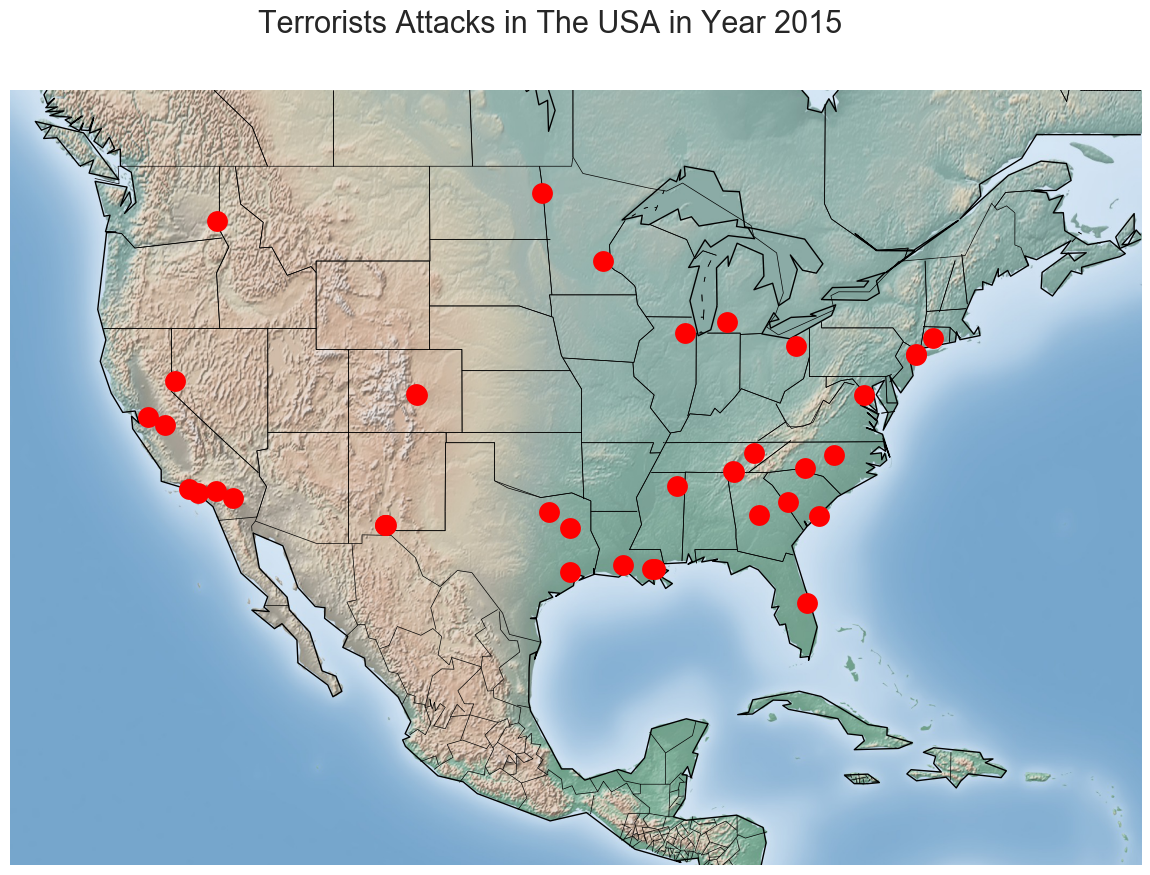

In [9]:
draw_per_year(data_america, -130, 13, -60, 52, 'USA', 'plot_americas_1.mp4')
from IPython.display import HTML
HTML("""
<video width="900" height="800" controls>
  <source src="plot_americas_1.mp4" type="video/mp4">
</video>
""")

The distribution of Terrorist attacks on Africa and the Middle East:

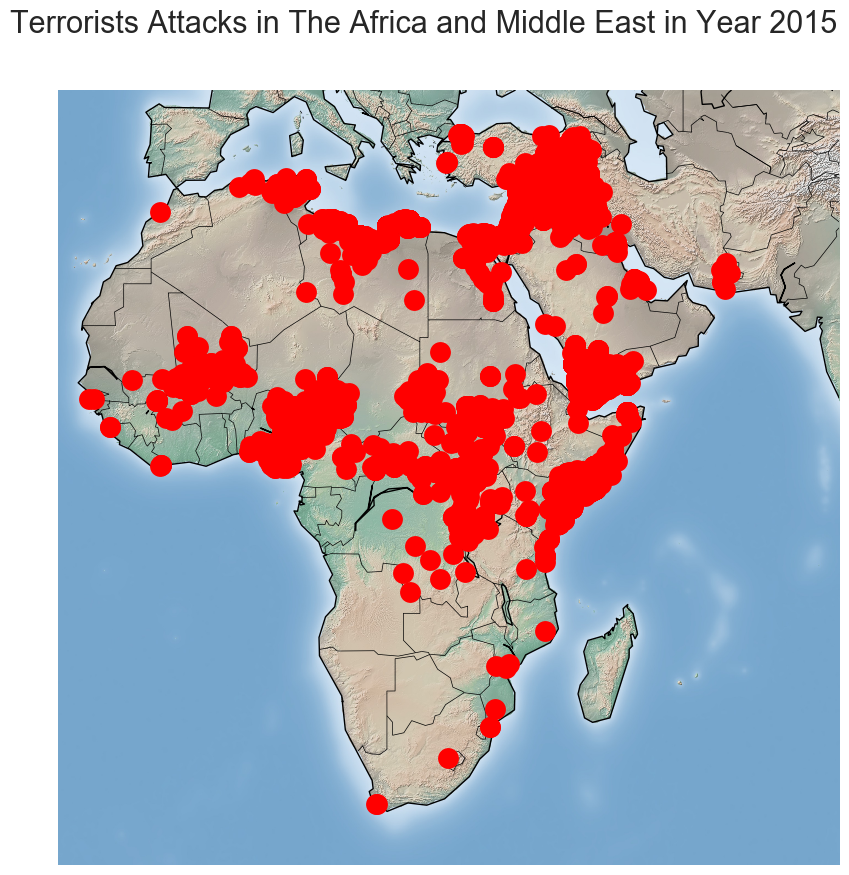

In [10]:
africa_middle_east = data[(data.region_txt=='Sub-Saharan Africa')|(data.region_txt=='Middle East & North Africa')]
draw_per_year(africa_middle_east,-20 , -40 , 75, 45, 'Africa and Middle East' ,'plot_africa_middle_east0.mp4')
HTML("""
<video width="900" height="800" controls>
  <source src='plot_africa_middle_east0.mp4' type="video/mp4">
</video>
""")

The distribution of Terrorist attacks on South America:

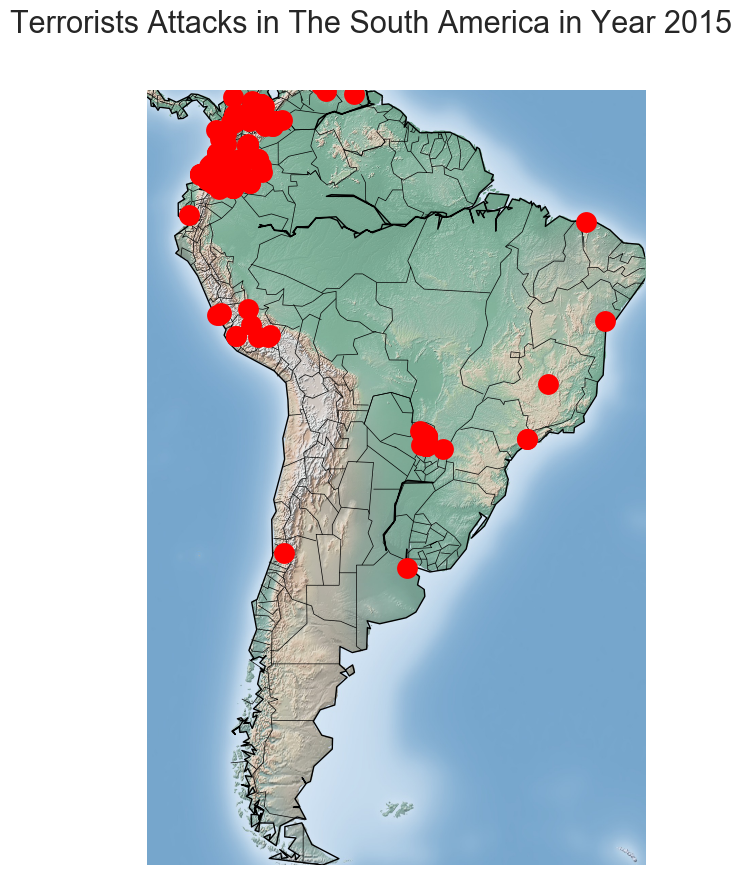

In [13]:
south_america = data[data.region_txt=='South America']
draw_per_year(south_america , -84, -55, -35, 10, 'South America','plot_south_america0.mp4')
HTML("""
<video width="900" height="800" controls>
  <source src='plot_south_america0.mp4' type="video/mp4">
</video>
""")

The distribution of Terrorist attacks on Asia:

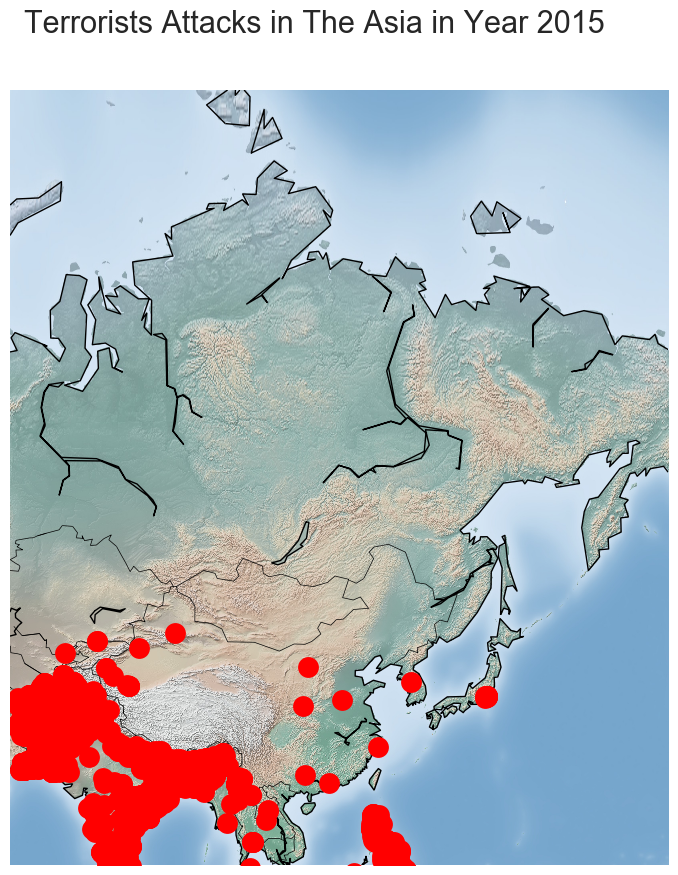

In [14]:
asian_countries = data[(data.region_txt=='Southeast Asia')|(data.region_txt=='East Asia')|(data.region_txt=='South Asia')|(data.region_txt=='Central Asia')]
draw_per_year(asian_countries, 60, 10, 170, 80, 'Asia' ,'plot_asian_countries0.mp4')
HTML("""
<video width="900" height="800" controls>
  <source src='plot_asian_countries0.mp4' type="video/mp4">
</video>
""")

The distribution of Terrorist attacks on Australasia & Oceania:

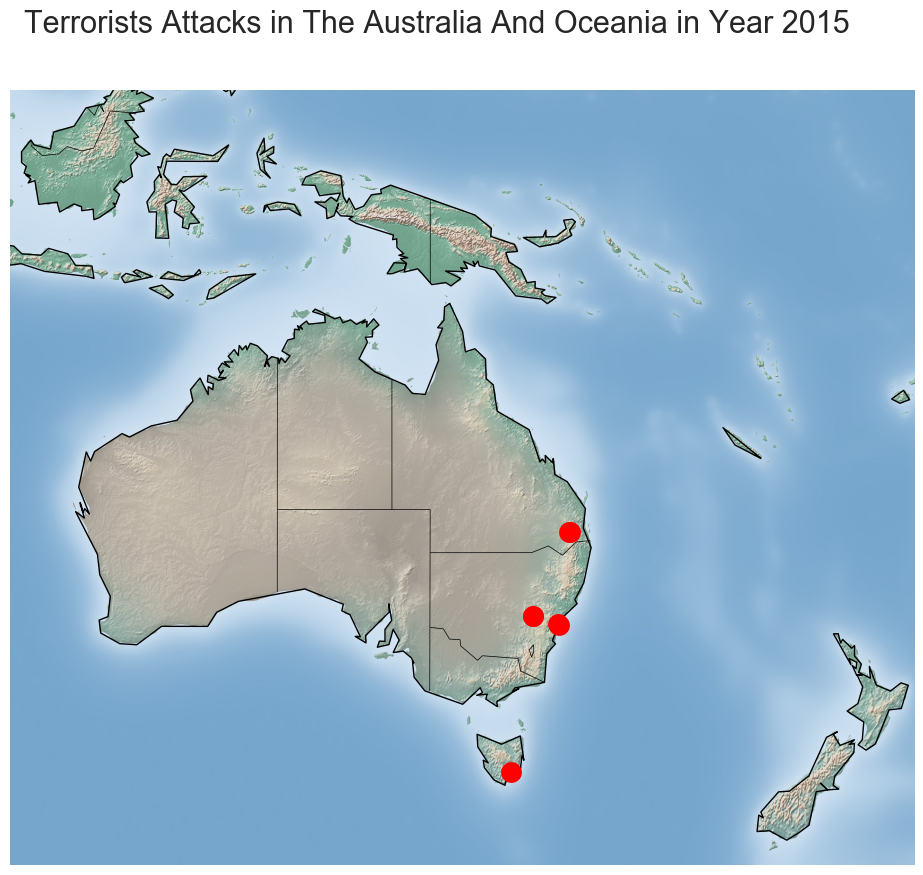

In [ ]:
australia_oceania = data[data.region_txt=='Australasia & Oceania']
draw_per_year(australia_oceania, 108, -48, 179, 6, 'Australia And Oceania','plot_australia_oceania0.mp4')
HTML("""
<video width="900" height="800" controls>
  <source src='plot_australia_oceania0.mp4' type="video/mp4">
</video>
""")

The distribution of Terrorist attacks on Central America & Caribbean:

In [ ]:
central_america = data[data.region_txt=='Central America & Caribbean']
draw_per_year(central_america , -100, 0, -70, 25, 'Central America','plot_central_america0.mp4')
from IPython.display import HTML
HTML("""
<video width="900" height="800" controls>
  <source src="plot_central_america0.mp4" type="video/mp4">
</video>
""")

The distribution of Terrorist attacks on Europe:

In [ ]:
european_countries = data[(data.region_txt=='Western Europe')|(data.region_txt=='Eastern Europe')]
draw_per_year(european_countries , -100, 0, -70, 25, 'Europe','plot_europe_countries0.mp4')
HTML("""
<video width="900" height="800" controls>
  <source src='plot_european_countries0.mp4' type="video/mp4">
</video>
""")

The distribution of Terrorist attacks on North America:

In [ ]:
north_america = data[data.region_txt=='North America']
draw_per_year(north_america, -165, 20, -55, 70, 'North America','plot_north_america0.mp4')
HTML("""
<video width="900" height="800" controls>
  <source src='plot_north_america0.mp4' type="video/mp4">
</video>
""")

For each continent, we are grouping the subdataset by the year and getting the total count of the casualties for each year so
that we can plot the trends:

In [5]:
north_america_grouped = north_america.groupby('iyear').count().reset_index()
africa_middle_east_grouped = africa_middle_east.groupby('iyear').count().reset_index()
south_america_grouped = south_america.groupby('iyear').count().reset_index()
asian_countries_grouped = asian_countries.groupby('iyear').count().reset_index()
australia_oceania_grouped = australia_oceania.groupby('iyear').count().reset_index()
european_countries_grouped = european_countries.groupby('iyear').count().reset_index()
central_america_grouped = central_america.groupby('iyear').count().reset_index()

Here we are just selecting the relevent columns:

In [6]:
north_america_grouped = north_america_grouped[['iyear','nkill','nwoundte']] 
africa_middle_east_grouped = africa_middle_east_grouped[['iyear','nkill','nwoundte']] 
south_america_grouped = south_america_grouped[['iyear','nkill','nwoundte']] 
asian_countries_grouped = asian_countries_grouped[['iyear','nkill','nwoundte']]
australia_oceania_grouped = australia_oceania_grouped[['iyear','nkill','nwoundte']] 
european_countries_grouped = european_countries_grouped[['iyear','nkill','nwoundte']] 
central_america_grouped = central_america_grouped[['iyear','nkill','nwoundte']]

Creating a new column that summs the casualties (the dead + the wounded)

In [7]:
north_america_grouped['sum_kill_wou']= north_america_grouped['nkill'] + north_america_grouped['nwoundte']
africa_middle_east_grouped['sum_kill_wou']= africa_middle_east_grouped['nkill'] + africa_middle_east_grouped['nwoundte']
south_america_grouped['sum_kill_wou']= south_america_grouped['nkill'] + south_america_grouped['nwoundte']
asian_countries_grouped['sum_kill_wou']= asian_countries_grouped['nkill'] + asian_countries_grouped['nwoundte']
australia_oceania_grouped['sum_kill_wou']= australia_oceania_grouped['nkill'] + australia_oceania_grouped['nwoundte']
european_countries_grouped['sum_kill_wou']= european_countries_grouped['nkill'] + european_countries_grouped['nwoundte']
central_america_grouped['sum_kill_wou']= central_america_grouped['nkill'] + central_america_grouped['nwoundte']

Now we plot the trends for each continent in plotly:

In [ ]:
import plotly.tools as tls
import plotly.graph_objs as go
tls.set_credentials_file(username='mahachi', api_key='MNTviotceAXcEQG1i8xu')

year_list = north_america_grouped["iyear"].tolist()
north_list = north_america_grouped['sum_kill_wou'].tolist()
africa_list = africa_middle_east_grouped['sum_kill_wou'].tolist()
south_amer_list = south_america_grouped['sum_kill_wou'].tolist()
asian_list = asian_countries_grouped['sum_kill_wou'].tolist()
austr_list = australia_oceania_grouped['sum_kill_wou'].tolist()
euro_list = european_countries_grouped['sum_kill_wou'].tolist()
central_list = central_america_grouped['sum_kill_wou'].tolist()

# Create and style traces
#North America:
trace0 = go.Scatter(
    x = year_list,
    y = north_list ,
    name = 'North Amerca',
    line = dict(
        color = ('rgb(215, 32, 74)'),
        width = 4)
)
trace1 = go.Scatter(
    x = year_list,
    y = africa_list,
    name = 'Africa and Middle East',
    line = dict(
        color = ('rgb(29, 96, 17)'),
        width = 4)
)
trace2 = go.Scatter(
    x = year_list,
    y = south_amer_list,
    name = 'South America',
    line = dict(
        color = ('rgb(115, 52, 24)'),
        width = 4)
)
trace3 = go.Scatter(
    x = year_list,
    y = asian_list,
    name = 'Asia',
    line = dict(
        color = ('rgb(29, 76, 147)'),
        width = 4)
)
trace4 = go.Scatter(
    x = year_list,
    y = austr_list,
    name = 'Australia and Oceania',
    line = dict(
        color = ('rgb(200, 12, 34)'),
        width = 4)
)
trace5 = go.Scatter(
    x = year_list,
    y = euro_list,
    name = 'Europe',
    line = dict(
        color = ('rgb(12, 96, 147)'),
        width = 4)
)
trace6 = go.Scatter(
    x = year_list,
    y = central_list,
    name = 'Central America',
    line = dict(
        color = ('rgb(22, 86, 167)'),
        width = 4)
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

layout = dict(title = 'Number of Casualties (Dead or Wounded) for Each Continent',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Number of Casualties'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='number_of_casualties')

Wordcloud of the attack summary:

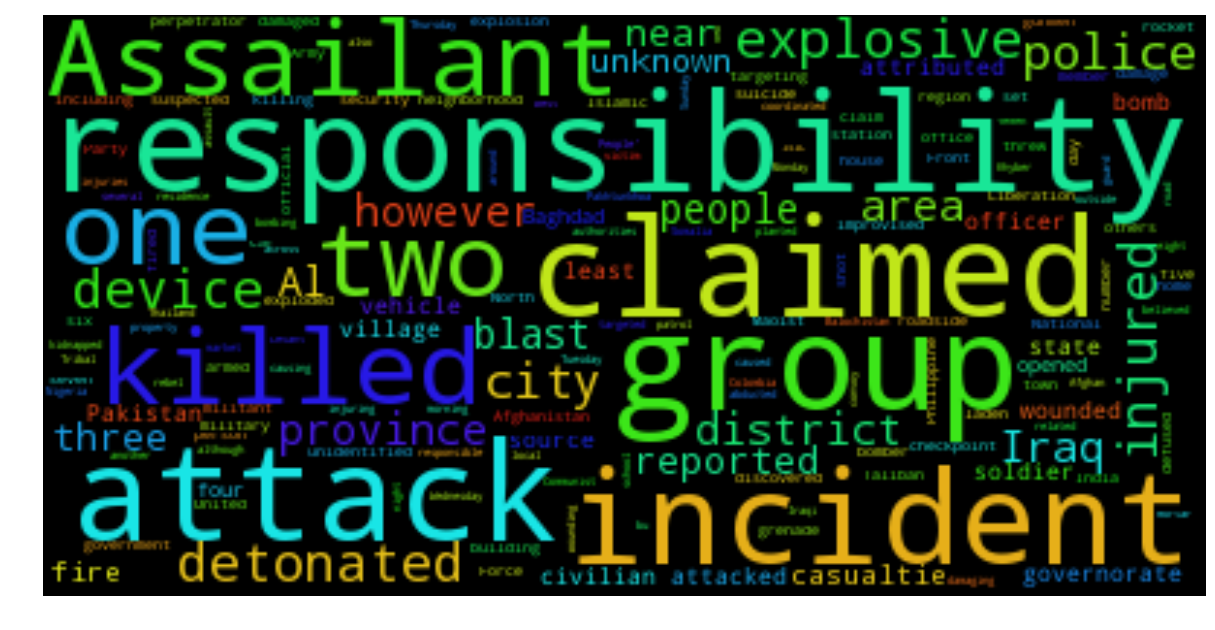

In [12]:
wordcloud = WordCloud(background_color="black")
wordcloud.generate(' '.join(data.summary.dropna().values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Wordcloud of the attack type:

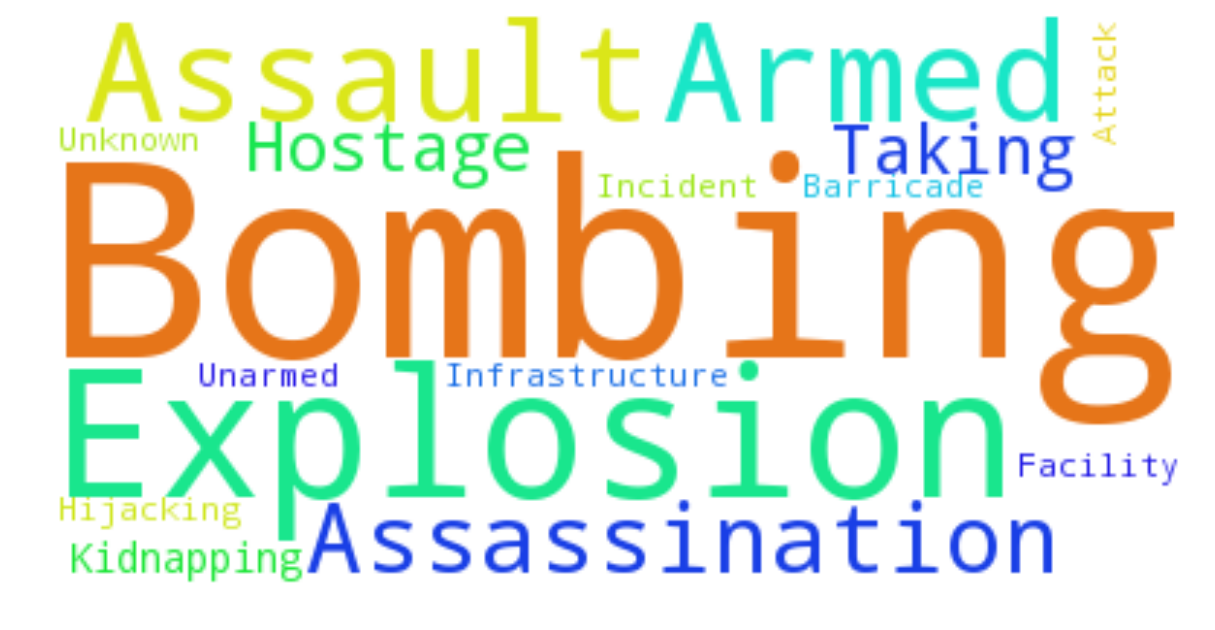

In [13]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate(' '.join(data.attacktype1_txt.dropna().values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Wordclous for the target groups of the attacks:

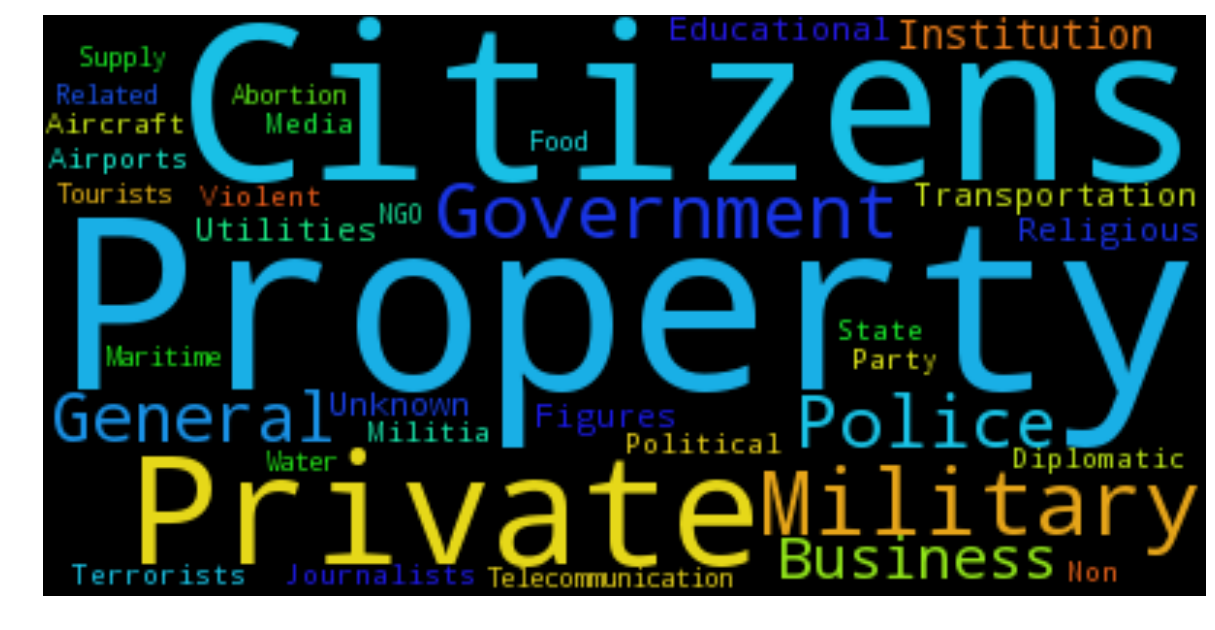

In [14]:
wordcloud = WordCloud(background_color="black")
wordcloud.generate(' '.join(data.targtype1_txt.dropna().values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

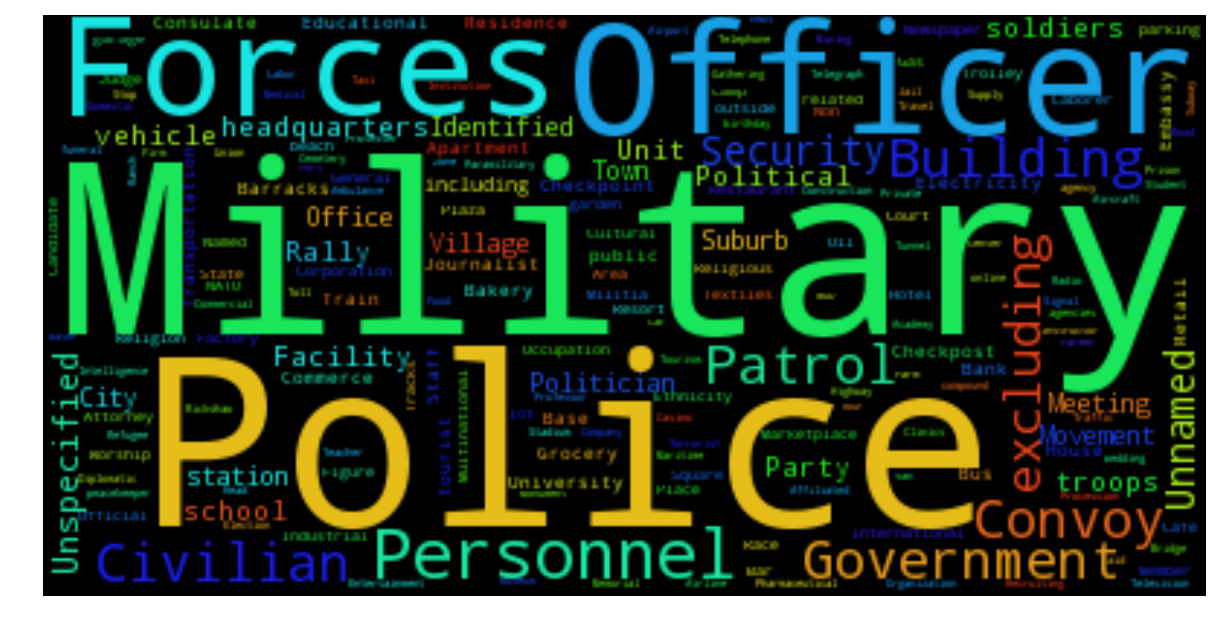

In [15]:
wordcloud = WordCloud(background_color="black")
wordcloud.generate(' '.join(data.targsubtype1_txt.dropna().values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Wordcloud showing the countries most affected by the terrorist attacks:

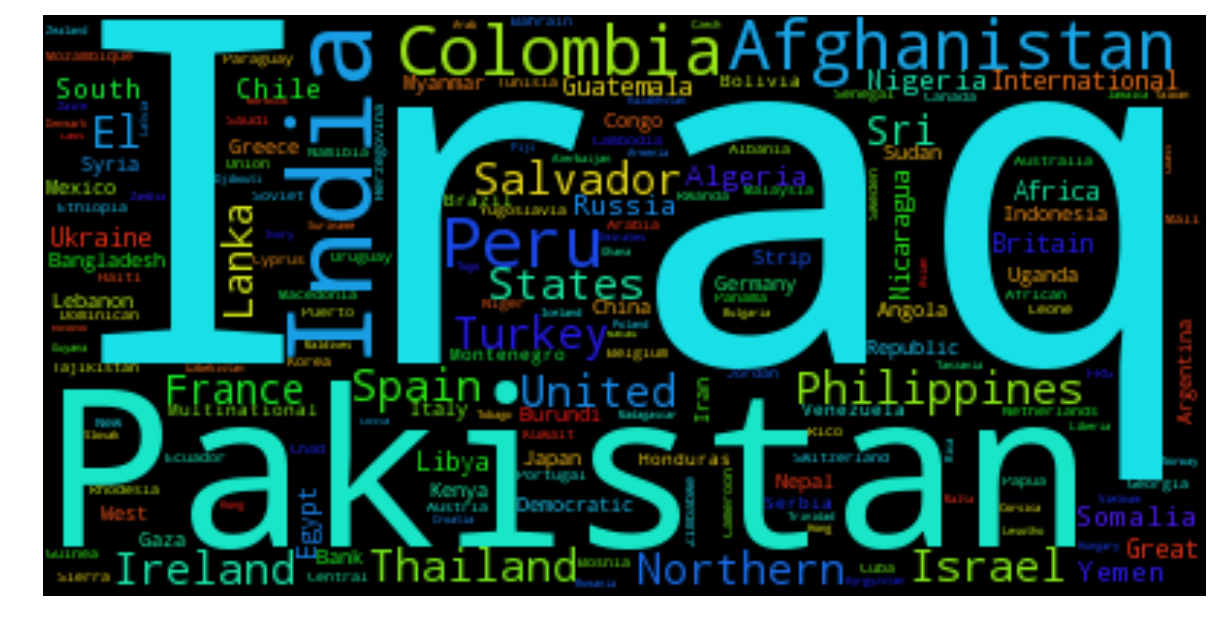

In [16]:
wordcloud = WordCloud(background_color="black")
wordcloud.generate(' '.join(data.natlty1_txt.dropna().values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Wordcloud showing the most active terrorist groups (or groups related to the terrorists attacks):

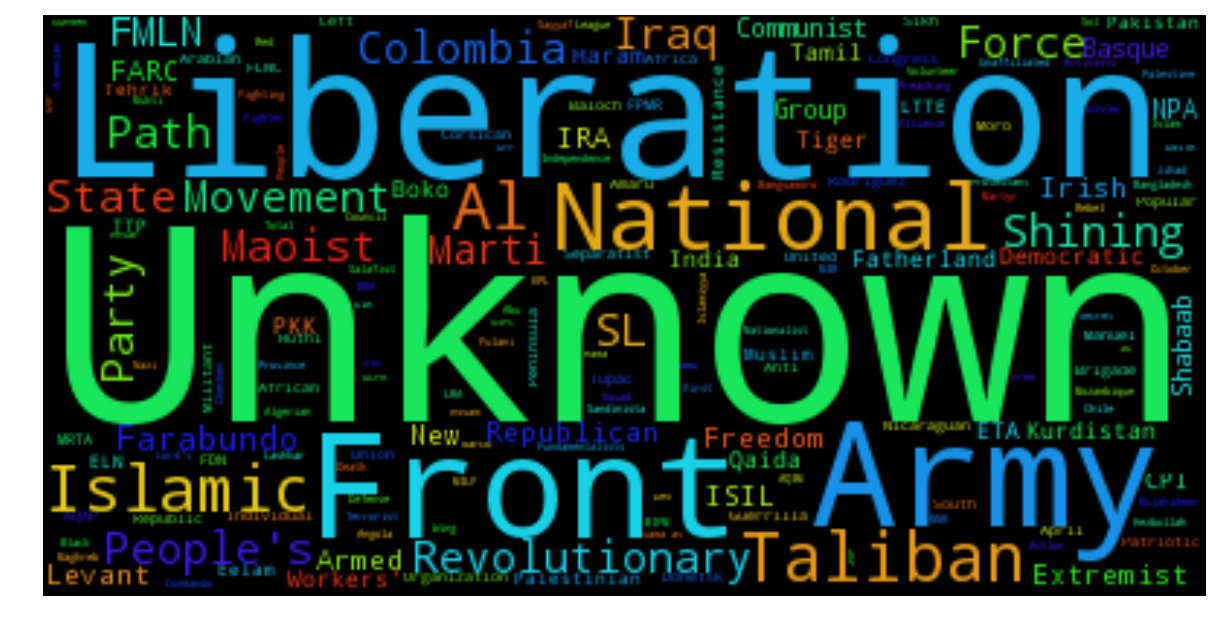

In [17]:
wordcloud = WordCloud(background_color="black")
wordcloud.generate(' '.join(data.gname.dropna().values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Wordcloud showing the prevelant motives of the attackers:

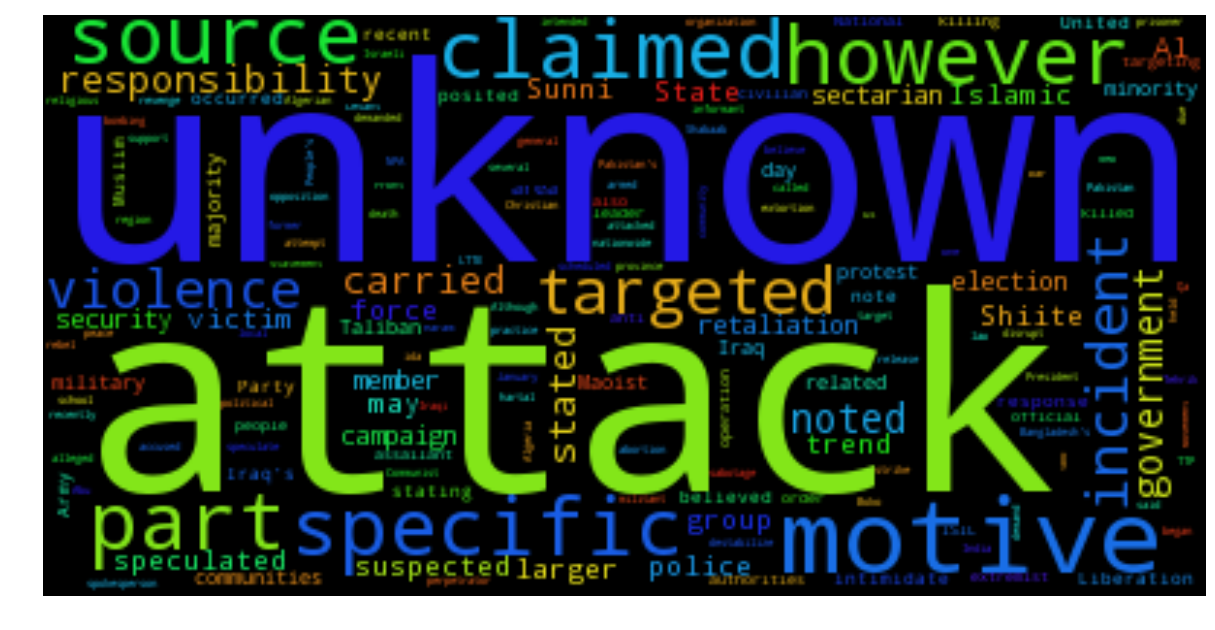

In [18]:
wordcloud = WordCloud(background_color="black")
wordcloud.generate(' '.join(data.motive.dropna().values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Wordcloud showing the most prevalent weapon type:

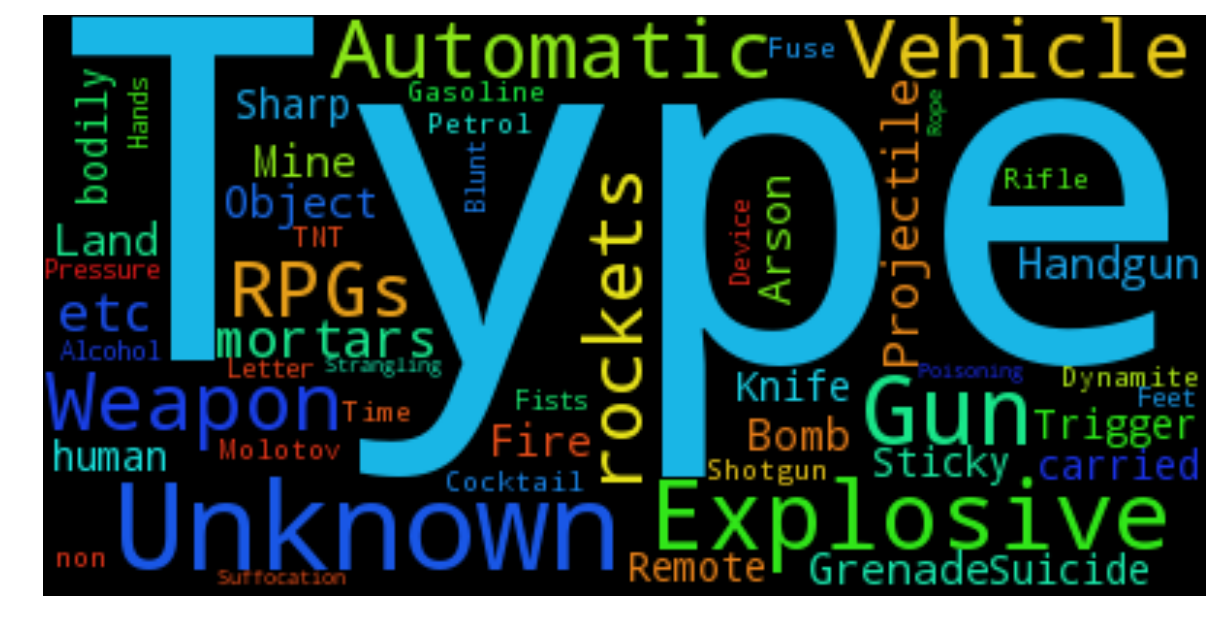

In [19]:
wordcloud = WordCloud(background_color="black")
wordcloud.generate(' '.join(data.weapsubtype1_txt.dropna().values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()